In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = {
    "label": ["spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham"],
    "message": [
        "Win a free iPhone now",
        "Hey, are we meeting today?",
        "Congratulations, you won a prize",
        "Can we talk later?",
        "Claim your free reward now",
        "See you at dinner",
        "You have won lottery money",
        "Let's go to the movie"
    ]
}

df = pd.DataFrame(data)
df

,label,message
0,spam,Win a free iPhone now
1,ham,"Hey, are we meeting today?"
2,spam,"Congratulations, you won a prize"
3,ham,Can we talk later?
4,spam,Claim your free reward now
5,ham,See you at dinner
6,spam,You have won lottery money
7,ham,Let's go to the movie


In [4]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})
df

,label,message
0,1,Win a free iPhone now
1,0,"Hey, are we meeting today?"
2,1,"Congratulations, you won a prize"
3,0,Can we talk later?
4,1,Claim your free reward now
5,0,See you at dinner
6,1,You have won lottery money
7,0,Let's go to the movie


In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [8]:
y_pred = model.predict(X_test)
y_pred

array([1, 1])

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.0


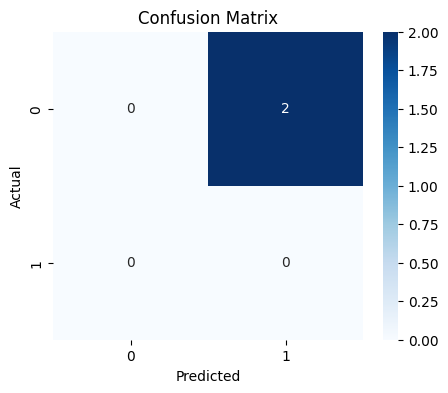

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\Atharav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Atharav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Atharav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [13]:
#testing
new_email = ["Congratulations! You won free money"]
new_email_vector = vectorizer.transform(new_email)

prediction = model.predict(new_email_vector)

if prediction[0] == 1:
    print("🚨 Spam Email Detected")
else:
    print("✅ Not Spam Email")

🚨 Spam Email Detected
